In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Select relevant columns of the dataset 'City_of_Burlington_Property_Details.csv'. Irrelevant columns such as 'AccountNumber','ParcelID','SpanNumber', which serve as identifiers of properties, and columns consisting of owners' names are omitted. The dataframe df contains the infos relevant for analysis of Sale Prices and property values.

In [2]:
df = pd.read_csv('City_of_Burlington_Property_Details.csv',usecols=['StreetNumber','StreetName','Unit','LandUse','CurrentAcres',
                                                               'TotalGrossArea','FinishedArea','CurrentValue','CurrentLandValue',
                                                               'CurrentYardItemsValue','CurrentBuildingValue','BuildingType',
                                                               'HeatFuel','HeatType','Grade','YearBlt','SalePrice','NumofRooms',
                                                               'NumofBedrooms','NumofUnits','ZoningCode','Foundation','Depreciation',
                                                               'PropertyCenterPoint','FID'])

## 'FID' serves as an unique identifier of a properpty. 'FID' should NOT be chosen as a variable in any machine learning model.

In [3]:
df = df.set_index('FID')

## Check the percentage of missing data in each column.

In [4]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000462
StreetName               0.000000
Unit                     0.808346
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.037020
HeatFuel                 0.045513
HeatType                 0.039051
Grade                    0.037020
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.005078
Foundation               0.041544
Depreciation             0.000000
PropertyCenterPoint      0.020033
dtype: float64

## 'Unit' misses over 80% of datas. The 'Unit' column should be dropped.

In [5]:
df = df.drop(columns=['Unit'])

## After the 'Unit' column is deleted, every column has at least 90% valid data.

In [6]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000462
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.037020
HeatFuel                 0.045513
HeatType                 0.039051
Grade                    0.037020
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.005078
Foundation               0.041544
Depreciation             0.000000
PropertyCenterPoint      0.020033
dtype: float64

## It is ambiguous whether a StreetNumber serves as a tag for a Street, or indicates a certain location on the street.The following shows that StreetNumber is Not a tag for a Street.

In [7]:
df_street=df[['StreetNumber','StreetName']].set_index('StreetNumber').sort_index().head(20)
print(df_street)

                      StreetName
StreetNumber                    
0                        EAST AV
0             APPLETREE POINT RD
0                  UNIVERSITY RD
0                   INTERVALE RD
0                        DANS CT
0                   INSTITUTE RD
0                       FLYNN AV
0                   INSTITUTE RD
0                   INSTITUTE RD
0                    WOODLAWN RD
0                    WOODLAWN RD
0             APPLETREE POINT RD
0                    WOODLAWN RD
0             APPLETREE POINT RD
0                        EAST AV
0                NORTH AVENUE EX
0                       NORTH ST
0                      SPRUCE ST
0                   INSTITUTE RD
0                    STANBURY RD


## Drop the datas where StreetNumber cannot be identified, losing 0.046% of datas

In [8]:
df=df[df.StreetNumber.notnull()] 

In [9]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.036668
HeatFuel                 0.045165
HeatType                 0.038700
Grade                    0.036668
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.004618
Foundation               0.041193
Depreciation             0.000000
PropertyCenterPoint      0.019581
dtype: float64

## The values in StreetName will be converted to numerics based on the number of times a specific street name presents in the column. A more popular street name indicates a relatively large amount of housing properties on the street, which might have an subtle effect on housing property values. If two street names happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [10]:
StreetNameCode = df['StreetName'].value_counts().to_dict()
df['StreetName'] = df['StreetName'].map(StreetNameCode)
df.head(10)

,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,...,Grade,YearBlt,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint
FID,,,,,,,,,,,,,,,,,,,,,
1001,29,26,Exempt,0.17218,6225,3519.50000,497100.0,324000,2400,170700.0,...,AVERAGE,1890,0,12,4,1,I,BS,0.300,"(-73.1993, 44.48146)"
1002,148,20,Single Family,0.18221,2642,1288.00000,235100.0,146900,0,88200.0,...,AVERAGEMINUS,1950,0,6,3,1,RL,C,0.300,"(-73.2126, 44.4648)"
1003,173,172,Commercial,0.46671,31596,18265.56055,1476300.0,313000,18200,1145100.0,...,AVERAGE,1899,0,0,0,9,DT,BS,0.180,"(-73.2143, 44.47423)"
1004,69,32,Single Family,0.05597,1760,840.00000,152500.0,121600,0,30900.0,...,FAIR PLUS,1912,158000,5,2,1,RM,BS,0.359,"(-73.2122, 44.4691)"
1005,25,21,Single Family,0.08242,2676,1436.00000,241900.0,94400,700,146800.0,...,AVERAGE,1899,231750,7,3,1,RM,BS,0.098,"(-73.2125, 44.48854)"
1006,133,137,Residential Condo,0.00000,2184,1572.80005,268000.0,0,0,268000.0,...,GOOD,1986,381500,6,2,1,RL,S,0.025,"(-73.2681, 44.52157)"
1007,14,10,Single Family,0.09832,3699,2087.00000,340800.0,130100,0,210700.0,...,AVERAGE PLUS,1910,430000,8,4,1,RL,BS,0.174,"(-73.2051, 44.48153)"
1008,68,40,Single Family,1.01251,7736,4266.60010,655800.0,363000,0,292800.0,...,AVERAGE PLUS,1950,0,9,4,1,RL,C,0.246,"(-73.2033, 44.45796)"
1009,237,499,Apartments 5+Units,0.70154,62852,37977.00000,1905600.0,547700,51800,1306100.0,...,GOOD MINUS,2013,505683,103,53,26,RM,S,0.000,"(-73.2258, 44.4877)"


In [11]:
LandUseCode = df['LandUse'].value_counts().to_dict()
LandUseCode

{'Single Family': 5176,
 'Residential Condo': 2150,
 '2 Family': 1041,
 '3 Family': 369,
 'Apartments 5+Units': 367,
 'Commercial': 299,
 'Exempt': 285,
 '4 Family': 239,
 'Res. Vacant Land': 235,
 'Commercial and Residential': 158,
 'Mobile Home': 117,
 'Exempt Land': 112,
 'Commercial Condo': 91,
 'Seasonal home': 45,
 'Partial Exempt': 43,
 'Commercial Land': 34,
 'Industrial': 22,
 'Exempt Utility': 11,
 'Mobile Home w/Land': 8,
 'Farmland': 6,
 'RESIDENTAL APT CONDO': 6,
 'Utility Electric': 4,
 'Industrial Land': 3,
 'Utility Other': 3,
 'Farm': 2,
 'Commercial/Residential Condo': 1}

## We will drop records which are not for residential housing purposes

In [12]:
df = df[df.LandUse != 'Commercial']
df = df[df.LandUse != 'Commercial and Residential']
df = df[df.LandUse != 'Commercial Condo']
df = df[df.LandUse != 'Commercial Land']
df = df[df.LandUse != 'Industrial']
df = df[df.LandUse != 'Exempt Utility']
df = df[df.LandUse != 'Farmland']
df = df[df.LandUse != 'Utility Electric']
df = df[df.LandUse != 'Utility Other']
df = df[df.LandUse != 'Farm']
df = df[df.LandUse != 'Commercial/Residential Condo']

## The values in LandUse will be converted to numerics based on the number of times a specific LandUse type presents in the column. A more popular LandUse Type indicates a relatively large amount of housing properties, which might have an subtle effect on housing property values. If two LandUse types happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [13]:
df['LandUse']=df['LandUse'].map(LandUseCode)
df.head(10)

,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,...,Grade,YearBlt,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint
FID,,,,,,,,,,,,,,,,,,,,,
1001,29,26,285,0.17218,6225,3519.50000,497100.0,324000,2400,170700.0,...,AVERAGE,1890,0,12,4,1,I,BS,0.300,"(-73.1993, 44.48146)"
1002,148,20,5176,0.18221,2642,1288.00000,235100.0,146900,0,88200.0,...,AVERAGEMINUS,1950,0,6,3,1,RL,C,0.300,"(-73.2126, 44.4648)"
1004,69,32,5176,0.05597,1760,840.00000,152500.0,121600,0,30900.0,...,FAIR PLUS,1912,158000,5,2,1,RM,BS,0.359,"(-73.2122, 44.4691)"
1005,25,21,5176,0.08242,2676,1436.00000,241900.0,94400,700,146800.0,...,AVERAGE,1899,231750,7,3,1,RM,BS,0.098,"(-73.2125, 44.48854)"
1006,133,137,2150,0.00000,2184,1572.80005,268000.0,0,0,268000.0,...,GOOD,1986,381500,6,2,1,RL,S,0.025,"(-73.2681, 44.52157)"
1007,14,10,5176,0.09832,3699,2087.00000,340800.0,130100,0,210700.0,...,AVERAGE PLUS,1910,430000,8,4,1,RL,BS,0.174,"(-73.2051, 44.48153)"
1008,68,40,5176,1.01251,7736,4266.60010,655800.0,363000,0,292800.0,...,AVERAGE PLUS,1950,0,9,4,1,RL,C,0.246,"(-73.2033, 44.45796)"
1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,1306100.0,...,GOOD MINUS,2013,505683,103,53,26,RM,S,0.000,"(-73.2258, 44.4877)"
1010,288,92,5176,0.26113,7454,4433.00000,586500.0,148400,2000,436100.0,...,VRYGOODMINUS,1899,0,7,3,1,I,BS,0.270,"(-73.2076, 44.47417)"


In [14]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.034033
HeatFuel                 0.041977
HeatType                 0.036093
Grade                    0.034033
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.004315
Foundation               0.036093
Depreciation             0.000000
PropertyCenterPoint      0.017262
dtype: float64

## Drop the datas where the type of a building cannot be identified, losing 3.4% of datas

In [15]:
df=df[df.BuildingType.notnull()] 

In [16]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.008224
HeatType                 0.002132
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.003960
Foundation               0.002132
Depreciation             0.000000
PropertyCenterPoint      0.013504
dtype: float64

In [17]:
BuildingTypeCode = df['BuildingType'].value_counts().to_dict()
BuildingTypeCode

{'OLD STYLE': 2168,
 'RANCH': 1389,
 'COLONIAL': 1193,
 'CAPE COD': 1028,
 'TOWNHS END': 589,
 'TOWNHS INT': 482,
 'FLAT UP INT': 338,
 'MULTI-FAMLY': 298,
 'APARTMENTS': 291,
 'RAISED RANCH': 219,
 'FLAT UP END': 162,
 'VICTORIAN': 147,
 'CONTEMPORARY': 144,
 'MOBILE HOME': 111,
 'OTHER CONDO': 110,
 'FLAT 1ST END': 108,
 'FLAT CONDO': 103,
 'FLAT 1ST INT': 101,
 'SPLTLVL RNCH': 87,
 'FOUR SQUARE': 83,
 'DUPLEX': 81,
 'BUNGELOW': 60,
 'TOWNHS CONDO': 46,
 'SMALL CONDO': 44,
 'DECKER': 39,
 'DORM +RESID': 34,
 'TUDOR': 31,
 'ROOMNG HSE': 30,
 'COLLEGE': 29,
 'OFFICE GENR': 26,
 'CONTEM CONDO': 24,
 'COTTAGE': 22,
 'CHURCH SYNG': 19,
 'SCHOOLS ELEM': 14,
 'PENTHS CONDO': 14,
 'DOUBLE WIDE': 12,
 'OFFICE W/APT': 11,
 'FRATS + SOR': 11,
 'CONDO DETACH': 11,
 'PAVILIONS': 9,
 'RETL W APTS': 9,
 'APT ELEVATOR': 8,
 'FEDERAL': 8,
 'ASSOC HALL': 7,
 'ELDERLY HOME': 7,
 'FLAT W LOFT': 7,
 'WAREHSE GEN': 6,
 'CLTRL EDUCTN': 6,
 'FIRE STATION': 5,
 'REC FACILITY': 4,
 'PRK GRG MLT': 4,
 'GOVT BL

## The properties which do not seem to serve as residential housing purpose will be dropped.
## We find records with the building types being 'COLLEGE', 'OFFICE GENR', 'OFFICE W/APT', 'CHURCH SYNG',  'SCHOOLS ELEM', 'FEDERAL', 'ASSOC HALL', 'CLTRL EDUCTN' and most records with the building types appear less or equal to 5 times that might not fall into the category of residential housing. These records would NOT be used. A minority of residential housing properties are also dropped:  'TRIPLEX': 3, 'TOWN HOUSE': 2, etc. 
## The following drops the records with the building types being 'COLLEGE', 'OFFICE GENR', 'OFFICE W/APT', 'CHURCH SYNG',  'SCHOOLS ELEM', 'FEDERAL', 'ASSOC HALL', 'CLTRL EDUCTN'. 
## Records with the building types appear less or equal to 5 times will be dropped after the categories in BuildingType are converted to numerics.

In [18]:
df = df[df.BuildingType!='COLLEGE']
df = df[df.BuildingType!='OFFICE GENR']
df = df[df.BuildingType!='OFFICE W/APT']
df = df[df.BuildingType!='CHURCH SYNG']
df = df[df.BuildingType!='SCHOOLS ELEM']
df = df[df.BuildingType!='FEDERAL']
df = df[df.BuildingType!='ASSOC HALL']
df = df[df.BuildingType!='CLTRL EDUCTN']

## The values in BuildingType will be converted to numerics based on the number of times a specific BuildingType category presents in the column. A more popular BuildingType category indicates a relatively large amount of housing properties which have the building type, which might have an subtle effect on housing property values. If two BuildingType categories happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [19]:
df['BuildingType']=df['BuildingType'].map(BuildingTypeCode)
df.head(10)

,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,...,Grade,YearBlt,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint
FID,,,,,,,,,,,,,,,,,,,,,
1001,29,26,285,0.17218,6225,3519.50000,497100.0,324000,2400,170700.0,...,AVERAGE,1890,0,12,4,1,I,BS,0.300,"(-73.1993, 44.48146)"
1002,148,20,5176,0.18221,2642,1288.00000,235100.0,146900,0,88200.0,...,AVERAGEMINUS,1950,0,6,3,1,RL,C,0.300,"(-73.2126, 44.4648)"
1004,69,32,5176,0.05597,1760,840.00000,152500.0,121600,0,30900.0,...,FAIR PLUS,1912,158000,5,2,1,RM,BS,0.359,"(-73.2122, 44.4691)"
1005,25,21,5176,0.08242,2676,1436.00000,241900.0,94400,700,146800.0,...,AVERAGE,1899,231750,7,3,1,RM,BS,0.098,"(-73.2125, 44.48854)"
1006,133,137,2150,0.00000,2184,1572.80005,268000.0,0,0,268000.0,...,GOOD,1986,381500,6,2,1,RL,S,0.025,"(-73.2681, 44.52157)"
1007,14,10,5176,0.09832,3699,2087.00000,340800.0,130100,0,210700.0,...,AVERAGE PLUS,1910,430000,8,4,1,RL,BS,0.174,"(-73.2051, 44.48153)"
1008,68,40,5176,1.01251,7736,4266.60010,655800.0,363000,0,292800.0,...,AVERAGE PLUS,1950,0,9,4,1,RL,C,0.246,"(-73.2033, 44.45796)"
1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,1306100.0,...,GOOD MINUS,2013,505683,103,53,26,RM,S,0.000,"(-73.2258, 44.4877)"
1010,288,92,5176,0.26113,7454,4433.00000,586500.0,148400,2000,436100.0,...,VRYGOODMINUS,1899,0,7,3,1,I,BS,0.270,"(-73.2076, 44.47417)"


## Drops records with the building types appear less or equal to 5 times since most of them are not for the purpose of residential housing.

In [20]:
df = df[df.BuildingType > 5]

In [21]:
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.007664
HeatType                 0.001968
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.002796
Foundation               0.001864
Depreciation             0.000000
PropertyCenterPoint      0.012428
dtype: float64

## Drop the datas where HeatFuel cannot be identified, losing 0.76% of datas

In [22]:
df=df[df.HeatFuel.notnull()] 
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.000000
HeatType                 0.001670
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.002818
Foundation               0.001879
Depreciation             0.000000
PropertyCenterPoint      0.012419
dtype: float64

## The values in HeatFuel will be converted to numerics based on the number of times a specific HeatFuel category presents in the column. A more popular LandUse category indicates a relatively large amount of housing properties which have the type of LandUse, which might have an subtle effect on housing property values. If two LandUse categories happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [23]:
HeatFuelCode = df['HeatFuel'].value_counts().to_dict()
df['HeatFuel']=df['HeatFuel'].map(HeatFuelCode)
df[['StreetName','HeatFuel']].head(10)

,StreetName,HeatFuel
FID,,
1001,26,8187
1002,20,8187
1004,32,1039
1005,21,8187
1006,137,8187
1007,10,8187
1008,40,1039
1009,499,8187
1010,92,8187


## Drop the datas where HeatType cannot be identified, losing 0.17% of datas

In [24]:
df=df[df.HeatType.notnull()] 
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.000000
HeatType                 0.000000
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.002822
Foundation               0.001777
Depreciation             0.000000
PropertyCenterPoint      0.012440
dtype: float64

## The values in HeatType will be converted to numerics based on the number of times a specific HeatType category presents in the column. A more popular HeatType category indicates a relatively large amount of housing properties which have the heat type, which might have an subtle effect on housing property values. If two HeatType categories happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [25]:
HeatTypeCode = df['HeatType'].value_counts().to_dict()
df['HeatType']=df['HeatType'].map(HeatTypeCode)
df[['StreetName','HeatType']].head(10)

,StreetName,HeatType
FID,,
1001,26,3893
1002,20,3893
1004,32,3893
1005,21,4255
1006,137,4255
1007,10,3893
1008,40,3893
1009,499,4255
1010,92,4255


## Drop the datas where ZoningCode cannot be identified, losing 0.28% of datas

In [26]:
df=df[df.ZoningCode.notnull()] 
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.000000
HeatType                 0.000000
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.000000
Foundation               0.001782
Depreciation             0.000000
PropertyCenterPoint      0.011217
dtype: float64

## The values in ZoningCode will be converted to numerics based on the number of times a specific Zoning Code presents in the column. A more popular Zoning Code indicates a relatively large amount of housing properties which have the Zoning Code, which might have an subtle effect on housing property values. If two Zoning Codes categories happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [27]:
ZoningCodeDict = df['ZoningCode'].value_counts().to_dict()
df['ZoningCode']=df['ZoningCode'].map(ZoningCodeDict)
df[['StreetName','ZoningCode']].head(10)

,StreetName,ZoningCode
FID,,
1001,26,165
1002,20,5042
1004,32,1733
1005,21,1733
1006,137,5042
1007,10,5042
1008,40,5042
1009,499,1733
1010,92,165


## Drop the datas where the Foundation cannot be identified, losing 0.18% of datas

In [28]:
df=df[df.Foundation.notnull()] 
df.isnull().sum()/df.shape[0]

StreetNumber             0.000000
StreetName               0.000000
LandUse                  0.000000
CurrentAcres             0.000000
TotalGrossArea           0.000000
FinishedArea             0.000000
CurrentValue             0.000000
CurrentLandValue         0.000000
CurrentYardItemsValue    0.000000
CurrentBuildingValue     0.000000
BuildingType             0.000000
HeatFuel                 0.000000
HeatType                 0.000000
Grade                    0.000000
YearBlt                  0.000000
SalePrice                0.000000
NumofRooms               0.000000
NumofBedrooms            0.000000
NumofUnits               0.000000
ZoningCode               0.000000
Foundation               0.000000
Depreciation             0.000000
PropertyCenterPoint      0.011237
dtype: float64

## The values in Foundation will be converted to numerics based on the number of times a specific Foundation category presents in the column. A more popular Foundation category indicates a relatively large amount of housing properties which have the Foundation category, which might have an subtle effect on housing property values. If two Foundation categories happen to appear the exact same number of times on the dataframe, they will be encoded by the same number.

In [29]:
FoundationCode = df['Foundation'].value_counts().to_dict()
df['Foundation']=df['Foundation'].map(FoundationCode)
df[['StreetName','Foundation']].head(10)

,StreetName,Foundation
FID,,
1001,26,2628
1002,20,2322
1004,32,2628
1005,21,2628
1006,137,1219
1007,10,2628
1008,40,2322
1009,499,1219
1010,92,2628


## Drop the datas where PropertyCenterPoint cannot be identified, losing 1.1% of datas

In [30]:
df=df[df.PropertyCenterPoint.notnull()] 
df.isnull().sum()/df.shape[0]

StreetNumber             0.0
StreetName               0.0
LandUse                  0.0
CurrentAcres             0.0
TotalGrossArea           0.0
FinishedArea             0.0
CurrentValue             0.0
CurrentLandValue         0.0
CurrentYardItemsValue    0.0
CurrentBuildingValue     0.0
BuildingType             0.0
HeatFuel                 0.0
HeatType                 0.0
Grade                    0.0
YearBlt                  0.0
SalePrice                0.0
NumofRooms               0.0
NumofBedrooms            0.0
NumofUnits               0.0
ZoningCode               0.0
Foundation               0.0
Depreciation             0.0
PropertyCenterPoint      0.0
dtype: float64

## Since each value in 'PropertyCenterPoint' is a tuple consisted of the x,y coordinates, we will transform 'PropertyCenterPoint' into two columns, each representing the x or y coordinates of a property respectively.

In [31]:
coordinates = [eval(item) for item in df['PropertyCenterPoint']]
x,y = zip(*coordinates)
x_coordinate = pd.DataFrame(list(x))
y_coordinate = pd.DataFrame(list(y))

## Reset index to convert df into its original form in which we can perform concatenation of dataframes

In [32]:
df = df.reset_index()

## Add the column that records x-coordinates to the end of df

In [34]:
df = pd.concat([df,x_coordinate], axis=1)
df.columns.values[-1] = "PropertyCenterPoint_x"
df.iloc[:,20:25].head(10)

,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x
0,165,2628,0.300,"(-73.1993, 44.48146)",-73.1993
1,5042,2322,0.300,"(-73.2126, 44.4648)",-73.2126
2,1733,2628,0.359,"(-73.2122, 44.4691)",-73.2122
3,1733,2628,0.098,"(-73.2125, 44.48854)",-73.2125
4,5042,1219,0.025,"(-73.2681, 44.52157)",-73.2681
5,5042,2628,0.174,"(-73.2051, 44.48153)",-73.2051
6,5042,2322,0.246,"(-73.2033, 44.45796)",-73.2033
7,1733,1219,0.000,"(-73.2258, 44.4877)",-73.2258
8,165,2628,0.270,"(-73.2076, 44.47417)",-73.2076
9,1733,2628,0.399,"(-73.2078, 44.48131)",-73.2078


## Add the column that records y-coordinates to the end of df

In [36]:
df = pd.concat([df,y_coordinate], axis=1)
df.columns.values[-1] = "PropertyCenterPoint_y"
df.iloc[:,20:26].head(10)

,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
0,165,2628,0.300,"(-73.1993, 44.48146)",-73.1993,44.48146
1,5042,2322,0.300,"(-73.2126, 44.4648)",-73.2126,44.46480
2,1733,2628,0.359,"(-73.2122, 44.4691)",-73.2122,44.46910
3,1733,2628,0.098,"(-73.2125, 44.48854)",-73.2125,44.48854
4,5042,1219,0.025,"(-73.2681, 44.52157)",-73.2681,44.52157
5,5042,2628,0.174,"(-73.2051, 44.48153)",-73.2051,44.48153
6,5042,2322,0.246,"(-73.2033, 44.45796)",-73.2033,44.45796
7,1733,1219,0.000,"(-73.2258, 44.4877)",-73.2258,44.48770
8,165,2628,0.270,"(-73.2076, 44.47417)",-73.2076,44.47417
9,1733,2628,0.399,"(-73.2078, 44.48131)",-73.2078,44.48131


## All values in the dataframe df should be numerics now. 
## Take a look at df and some thoughts on the dataframe is as follows. 
### 1.Some of the values are zero, which migt be due to the BuildingType/LandUse.
### 2.Many properties do not have a yard. Hence CurrentYardItemsValue is zero.
### 3.Some of properties are rooms/condos, hence CurrentAcres and CurrentLandValue are zero.
### 4.Many Sale Prices are zero. This could mean the property was not in a transaction.

In [28]:
df

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
0,1001,29,26,285,0.17218,6225,3519.50000,497100.0,324000,2400,...,0,12,4,1,231,2927,0.3000,"(-73.1993, 44.48146)",-73.1993,44.48146
1,1002,148,20,5176,0.18221,2642,1288.00000,235100.0,146900,0,...,0,6,3,1,5132,2531,0.3000,"(-73.2126, 44.4648)",-73.2126,44.46480
2,1003,173,172,299,0.46671,31596,18265.56055,1476300.0,313000,18200,...,0,0,0,9,191,2927,0.1800,"(-73.2143, 44.47423)",-73.2143,44.47423
3,1004,69,32,5176,0.05597,1760,840.00000,152500.0,121600,0,...,158000,5,2,1,1796,2927,0.3590,"(-73.2122, 44.4691)",-73.2122,44.46910
4,1005,25,21,5176,0.08242,2676,1436.00000,241900.0,94400,700,...,231750,7,3,1,1796,2927,0.0980,"(-73.2125, 44.48854)",-73.2125,44.48854
5,1006,133,137,2150,0.00000,2184,1572.80005,268000.0,0,0,...,381500,6,2,1,5132,1383,0.0250,"(-73.2681, 44.52157)",-73.2681,44.52157
6,1007,14,10,5176,0.09832,3699,2087.00000,340800.0,130100,0,...,430000,8,4,1,5132,2927,0.1740,"(-73.2051, 44.48153)",-73.2051,44.48153
7,1008,68,40,5176,1.01251,7736,4266.60010,655800.0,363000,0,...,0,9,4,1,5132,2531,0.2460,"(-73.2033, 44.45796)",-73.2033,44.45796
8,1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,...,505683,103,53,26,1796,1383,0.0000,"(-73.2258, 44.4877)",-73.2258,44.48770
9,1010,288,92,5176,0.26113,7454,4433.00000,586500.0,148400,2000,...,0,7,3,1,231,2927,0.2700,"(-73.2076, 44.47417)",-73.2076,44.47417


## Since predicting SalePrice and evaluate CurrentValue is a major goal of the project, we will only take records where SalePrice and CurrentValue are positive.

In [40]:
print('The length of df is ',len(df))
df_sold = df[df.SalePrice>0]
print('The length of df_sold is ',len(df_sold))
df_sold_valued = df_sold[df_sold.CurrentValue>0]
print('The length of df_sold_valued is ',len(df_sold_valued))

The length of df is  9415
The length of df_sold is  4324
The length of df_sold_valued is  4322


## Next we will check outliers subjected to the following criterion.
### 1. Properties should have reasonable TotalGrossArea and FinishedArea.
### 2. Properties should have reasonable CurrentValue and SalePrice.
### 3. The properties should not be too old. The values in YearBlt should not be too small.
### 4. The number of rooms/bedrooms/units should be in a reasonable amount range.

## All properties have positive TotalGrossArea.

In [44]:
df_sold_valued[df_sold_valued.TotalGrossArea<=0] 

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## All properties have positive FinishedArea.

In [45]:
df_sold_valued[df_sold_valued.FinishedArea<=0] 

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## TotalGrossArea should be proportional to FinishedArea.
## We will use the quotient of the mean of TotalGrossArea over the mean of FinishedArea as a quantative standard to check if there is any outlier violating this rule.

In [47]:
df_sold_valued = df_sold_valued[df_sold_valued.FinishedArea>0]
AreaQuotient = df_sold_valued.TotalGrossArea.mean()/df_sold_valued.FinishedArea.mean()
print(AreaQuotient)

1.8641818114565056


## No record has TotalGrossArea that is significantly greater than FinishedArea.

In [49]:
df_sold_valued[df_sold_valued.TotalGrossArea>2.5*AreaQuotient*df_sold_valued.FinishedArea] 

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## No record has TotalGrossArea that is less than FinishedArea.

In [51]:
df_sold_valued[df_sold_valued.TotalGrossArea<df_sold_valued.FinishedArea] 

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## Most properties have a finished area not greater than 10000.

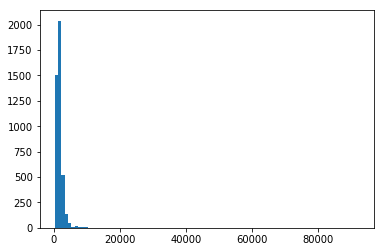

In [93]:
plt.gcf().clear()
plt.hist(df_sold_valued.FinishedArea, bins=np.arange(min(df_sold_valued.FinishedArea), max(df_sold_valued.FinishedArea) + 100, 1000))
plt.show()

## 10 properties have a finished area greater than 10000.

In [94]:
df_sold_valued[df_sold_valued.FinishedArea>10000]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
7,1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,...,505683,103,53,26,1733,1219,0.000,"(-73.2258, 44.4877)",-73.2258,44.48770
1737,2986,260,194,367,0.30450,14336,14061.00000,1542100.0,416200,3300,...,1500000,52,21,12,124,2628,0.104,"(-73.2098, 44.47758)",-73.2098,44.47758
2141,8461,155,35,367,1.99325,23544,14081.29492,1363500.0,770800,10600,...,2062500,14,6,13,5042,2628,0.399,"(-73.2567, 44.52003)",-73.2567,44.52003
3592,3157,355,86,367,0.25627,14620,10282.79980,1980800.0,382600,0,...,325000,43,33,10,685,2628,0.054,"(-73.2044, 44.48035)",-73.2044,44.48035
4079,3728,809,130,367,1.83655,71100,52008.80078,4988300.0,627200,12300,...,4250000,61,19,76,135,2628,0.246,"(-73.2152, 44.45695)",-73.2152,44.45695
5124,4922,500,179,367,0.00000,128222,92760.35156,7830000.0,3359400,0,...,14400000,48,32,81,165,2322,0.072,"(-73.1966, 44.46945)",-73.1966,44.46945
5818,5702,192,3,367,0.41494,24704,16065.00000,1347300.0,245300,9600,...,1600000,6,2,11,165,2628,0.210,"(-73.2044, 44.47461)",-73.2044,44.47461
6251,7194,60,9,367,0.19284,15804,10300.00000,924800.0,169000,800,...,775000,39,18,11,5042,1219,0.150,"(-73.2107, 44.45344)",-73.2107,44.45344
8249,10510,50,4,367,0.46281,16722,10244.00000,1155200.0,204600,0,...,275000,28,14,8,135,2628,0.021,"(-73.1844, 44.48799)",-73.1844,44.48799
9090,6630,347,172,367,0.61210,18857,12200.00000,942700.0,285800,0,...,900000,14,8,15,1733,2628,0.300,"(-73.2128, 44.46966)",-73.2128,44.46966


## Most properties have a finished area less than 4000.

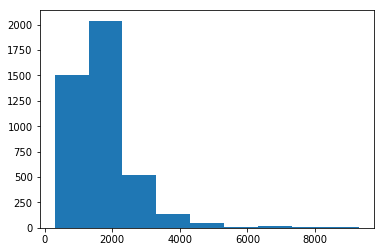

In [95]:
df_sold_valued_normalarea = df_sold_valued[df_sold_valued.FinishedArea<=10000]
plt.gcf().clear()
plt.hist(df_sold_valued_normalarea.FinishedArea, bins=np.arange(min(df_sold_valued_normalarea.FinishedArea), max(df_sold_valued_normalarea.FinishedArea) + 100, 1000))
plt.show()

## Verify that CurrentValue = CurrentLandValue + CurrentYardItemsValue +CurrentBuildingValue
## One outlier violates this criteria.

In [53]:
df_sold_valued[df_sold_valued.CurrentValue!=df_sold_valued.CurrentLandValue
                       +df_sold_valued.CurrentYardItemsValue+df_sold_valued.CurrentBuildingValue]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
8337,10609,258,122,367,0.49086,27130,20316.0,211399.998,162300,1200,...,285000,83,41,23,135,2322,0.0,"(-73.2085, 44.48682)",-73.2085,44.48682


## Drop the outlier that violates the formula of CurrentValue

In [54]:
df_sold_valued = df_sold_valued[df_sold_valued.CurrentValue==df_sold_valued.CurrentLandValue
                                   +df_sold_valued.CurrentYardItemsValue+df_sold_valued.CurrentBuildingValue]

## CurrentValue should be proportional to SalePrice.
## We will use the quotient of the mean of CurrentValue over the mean of SalePrice as a quantative standard to check if there is any outlier violating this rule.

In [56]:
PriceQuotient = df_sold_valued.CurrentValue.mean()/df_sold_valued.SalePrice.mean()
print(PriceQuotient)

0.9181128357953977


## One record has an unusual high SalePrice.

In [58]:
df_sold_valued[df_sold_valued.CurrentValue<0.1*df_sold_valued.SalePrice]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
4115,3767,67,62,117,0.0,1680,840.0,3800.0,0,200,...,56144,4,2,1,152,130,0.008,"(-73.244, 44.50748)",-73.244,44.50748


## 12 records have unusual low Sale Prices.

In [59]:
df_sold_valued[df_sold_valued.CurrentValue>10*df_sold_valued.SalePrice]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
33,1035,141,122,369,0.11134,5136,3120.00,287000.0,99400,0,...,22500,14,7,3,1733,2322,0.0540,"(-73.2118, 44.48452)",-73.2118,44.48452
126,1141,40,65,1041,0.17792,2632,1082.00,203500.0,120400,0,...,13500,6,2,2,5042,2628,0.3990,"(-73.2157, 44.45362)",-73.2157,44.45362
3176,681,20,37,1041,0.10620,4722,2874.00,260800.0,131700,0,...,1,14,6,2,1733,2628,0.1800,"(-73.2116, 44.47052)",-73.2116,44.47052
3570,3128,8,20,1041,0.14773,3741,2038.00,230000.0,96600,0,...,1,9,4,2,1026,2628,0.1230,"(-73.2194, 44.46085)",-73.2194,44.46085
3581,3143,65,23,5176,0.68724,3297,1536.00,265200.0,96700,0,...,2500,5,3,1,5042,3199,0.1030,"(-73.2614, 44.50961)",-73.2614,44.50961
3837,3438,72,35,5176,0.23072,3591,1914.00,321500.0,93000,900,...,25000,7,3,1,5042,2322,0.0540,"(-73.2624, 44.51139)",-73.2624,44.51139
3942,3560,412,172,369,0.16931,4956,2256.00,272700.0,144300,0,...,18000,9,4,3,1733,2628,0.3990,"(-73.2105, 44.46867)",-73.2105,44.46867
4129,3782,262,179,285,1.11111,18654,11592.00,2179300.0,978400,62900,...,1,16,1,15,5042,2628,0.4449,"(-73.2, 44.47298)",-73.2000,44.47298
4400,4087,59,23,1041,0.27548,4952,2352.00,259600.0,111300,0,...,10,8,4,2,1026,2628,0.1251,"(-73.2213, 44.45919)",-73.2213,44.45919
4920,4682,104,24,5176,0.30590,2795,1443.75,230700.0,78500,800,...,1,6,3,1,5042,3199,0.3000,"(-73.26, 44.51177)",-73.2600,44.51177


## Delete records with unusual high/low sale prices. A unusual high/low price might be due to a buyer/seller's unusual financial situation.

In [60]:
df_sold_valued = df_sold_valued[df_sold_valued.CurrentValue>=0.1*df_sold_valued.SalePrice] 
df_sold_valued = df_sold_valued[df_sold_valued.CurrentValue<=10*df_sold_valued.SalePrice] 

## The following histogram shows a small amount of properties have relatively high sale prices. However, they also have high current values.

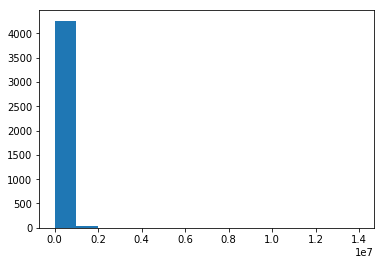

In [90]:
plt.gcf().clear()
plt.hist(df_sold_valued.SalePrice, bins=np.arange(min(df_sold_valued.SalePrice), max(df_sold_valued.SalePrice) + 10000, 1000000))
plt.show()

## 48 records have a sale price greater than 1000000.

In [86]:
df_sold_valued[df_sold_valued.SalePrice>1000000]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
65,1075,37,57,367,0.43489,13962,8823.79980,794700.0,321800,0,...,1942769,7,5,7,1733,2628,0.3000,"(-73.2084, 44.486)",-73.2084,44.48600
181,1205,55,125,367,0.11995,5530,3231.80005,625900.0,297600,0,...,1100000,21,8,5,685,2628,0.2070,"(-73.2059, 44.479)",-73.2059,44.47900
192,1220,11,5,5176,1.01451,12208,5120.39990,1819500.0,898300,0,...,1095000,10,4,1,1026,2322,0.0000,"(-73.2506, 44.5011)",-73.2506,44.50110
371,1416,42,52,367,0.39603,12014,7072.00000,1250700.0,478500,700,...,1300000,13,4,17,5042,2628,0.1500,"(-73.2006, 44.48196)",-73.2006,44.48196
510,1581,147,78,367,0.20661,10390,6831.60010,723700.0,348000,0,...,1075000,35,15,9,5042,2628,0.2460,"(-73.2034, 44.48302)",-73.2034,44.48302
633,1716,5,20,239,0.08391,7020,4846.00000,769800.0,262500,9200,...,1050000,20,12,4,1733,2628,0.3000,"(-73.209, 44.48126)",-73.2090,44.48126
871,1997,108,122,367,0.23005,7710,4992.00000,457100.0,229000,0,...,1200000,16,8,6,1733,2628,0.2460,"(-73.2109, 44.48363)",-73.2109,44.48363
1078,2226,120,81,367,0.38393,10954,5174.00000,947200.0,471600,100,...,1075000,8,4,5,5042,2628,0.2460,"(-73.2054, 44.48442)",-73.2054,44.48442
1219,2390,147,15,5176,0.78685,6745,2753.00000,824900.0,359300,800,...,1400000,9,4,1,5042,2322,0.3000,"(-73.2032, 44.46859)",-73.2032,44.46859
1650,2890,58,82,367,0.13728,6970,4584.00000,672600.0,299700,0,...,1055000,21,9,7,1733,2628,0.0780,"(-73.2092, 44.48214)",-73.2092,44.48214


## Most of properties are sold at a price between 150000 and 300000.

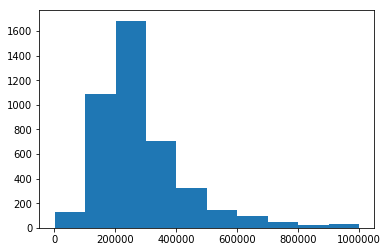

In [91]:
df_sold_valued_normalprice = df_sold_valued[df_sold_valued.SalePrice<=1000000]
plt.hist(df_sold_valued_normalprice.SalePrice, bins=np.arange(min(df_sold_valued_normalprice.SalePrice), max(df_sold_valued_normalprice.SalePrice) + 10000, 100000))
plt.show()

## The average built-year is 1950.

In [96]:
sum(df_sold_valued.YearBlt)/len(df_sold_valued)

1949.8409935004643

## All built-years are after 1799.

In [100]:
df_sold_valued[df_sold_valued.YearBlt<1800]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## All built-years are before 2016.

In [101]:
df_sold_valued[df_sold_valued.YearBlt>2015]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y


## Most buidlings were built in between 1850 and 2000.

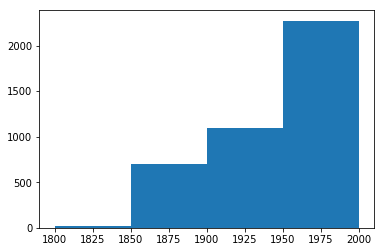

In [103]:
plt.gcf().clear()
plt.hist(df_sold_valued.YearBlt, bins=np.arange(min(df_sold_valued.YearBlt), max(df_sold_valued.YearBlt) + 10, 50))
plt.show()

## Most properties have less than 40 rooms. The property that has the most of rooms contains 103 rooms. 

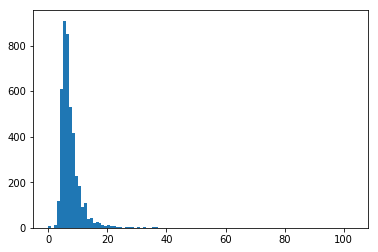

In [104]:
plt.gcf().clear()
plt.hist(df_sold_valued.NumofRooms, bins=np.arange(min(df_sold_valued.NumofRooms), max(df_sold_valued.NumofRooms) + 1, 1))
plt.show()

In [106]:
max(df_sold_valued.NumofRooms)

103

In [105]:
df_sold_valued[df_sold_valued.NumofRooms>20]

,FID,StreetNumber,StreetName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,...,SalePrice,NumofRooms,NumofBedrooms,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,PropertyCenterPoint_x,PropertyCenterPoint_y
7,1009,237,499,367,0.70154,62852,37977.00000,1905600.0,547700,51800,...,505683,103,53,26,1733,1219,0.0000,"(-73.2258, 44.4877)",-73.2258,44.48770
79,1090,111,194,367,0.09607,9196,5777.39990,911200.0,224100,0,...,920000,32,12,10,133,2628,0.0830,"(-73.2154, 44.47674)",-73.2154,44.47674
181,1205,55,125,367,0.11995,5530,3231.80005,625900.0,297600,0,...,1100000,21,8,5,685,2628,0.2070,"(-73.2059, 44.479)",-73.2059,44.47900
388,1433,32,47,367,0.08299,5445,3407.00000,359200.0,162400,0,...,287000,23,11,6,1733,2628,0.3990,"(-73.2161, 44.48556)",-73.2161,44.48556
510,1581,147,78,367,0.20661,10390,6831.60010,723700.0,348000,0,...,1075000,35,15,9,5042,2628,0.2460,"(-73.2034, 44.48302)",-73.2034,44.48302
767,1881,28,98,367,0.05372,6531,3742.00000,684800.0,149100,0,...,770000,22,10,6,685,2628,0.1470,"(-73.2189, 44.48116)",-73.2189,44.48116
1496,2709,4,78,367,0.14929,10185,5980.60010,661600.0,192400,0,...,335000,29,11,9,1733,2628,0.2460,"(-73.2092, 44.48329)",-73.2092,44.48329
1608,2841,426,104,367,0.51079,6920,3860.00000,547100.0,236900,1400,...,610000,25,13,6,5042,2322,0.2460,"(-73.1877, 44.48663)",-73.1877,44.48663
1650,2890,58,82,367,0.13728,6970,4584.00000,672600.0,299700,0,...,1055000,21,9,7,1733,2628,0.0780,"(-73.2092, 44.48214)",-73.2092,44.48214
1737,2986,260,194,367,0.30450,14336,14061.00000,1542100.0,416200,3300,...,1500000,52,21,12,124,2628,0.1040,"(-73.2098, 44.47758)",-73.2098,44.47758


## Most properties have less than 20 bedrooms. The property that has the most bedrooms contains 53 bedrooms.

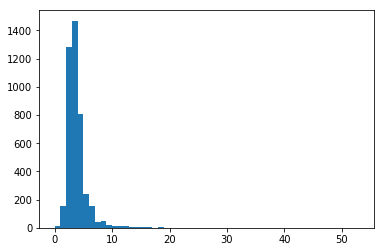

In [108]:
plt.gcf().clear()
plt.hist(df_sold_valued.NumofBedrooms, bins=np.arange(min(df_sold_valued.NumofBedrooms), max(df_sold_valued.NumofBedrooms) + 1, 1))
plt.show()

In [109]:
max(df_sold_valued.NumofBedrooms)

53

## Most properties have less than 10 units. The property that has the most units contains 81 units.

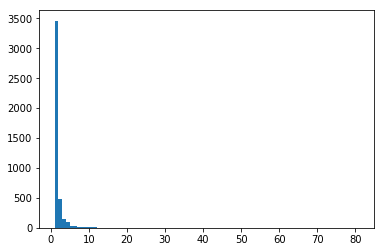

In [110]:
plt.gcf().clear()
plt.hist(df_sold_valued.NumofUnits, bins=np.arange(min(df_sold_valued.NumofUnits), max(df_sold_valued.NumofUnits) + 1, 1))
plt.show()

In [111]:
max(df_sold_valued.NumofUnits)

81

In [112]:
df_sold_valued.to_csv('Property_2018.12.4.csv',index=False)